# **目录**

>**<a href="#section1">1. Seaborn 库 和 Matplotlib 库</a>**    
>
>**<a href="#section2">2. 绘制柱状图</a>**    
>>**<a href="#section2.1">2.1 用 Seaborn 绘制基础柱状图</a>**   
>>>**<a href="#section2.1.1">2.1.1 基础柱状图</a>**    
>>>
>>>**<a href="#section2.1.2">2.1.2 Count Plot</a>**   
>>
>>**<a href="#section2.2">2.2 柱分组 & 去除误差线</a>**   
>>
>>**<a href="#section2.3">2.3 设置总主题风格</a>**         
>>
>>**<a href="#section2.4">2.4 调整图例</a>**    
>>
>>**<a href="#section2.5">2.5 修改颜色</a>**  
>
>**<a href="#section3">3. 绘制其他图</a>**  
>>**<a href="#section3.1">3.1 点线图</a>**   
>>
>>**<a href="#section3.2">3.2 直方图</a>**         
>>>**<a href="#section3.2.1">3.2.1 stat 参数</a>**
>>>
>>>**<a href="#section3.2.2">3.2.2 common_norm 参数</a>**
>>
>>**<a href="#section3.3">3.3 箱线图</a>**    
>>
>>**<a href="#section3.4">3.4 小提琴图</a>**  
>>
>>**<a href="#section3.5">3.5 散点图 & 分簇散点图</a>**
>
>**<a href="#links">相关链接合集</a>**   

**<h1 id="section1">1. Seaborn 库 和 Matplotlib 库</h1>**

⭕**注意：预先下载 Seaborn 库**  

用 VS code (本地) 编辑 Jupyter Notebook 时，若想导入 Seaborn 库 (to import Seaborn library)，需要先下载库 (to install Seaborn library)，用以下代码下载最新版 Seaborn 库：  
```
pip install seaborn
```

用 Google Colab 编辑则无需下载。

In [1]:
import seaborn as sns  # 导入 Seaborn 库

In [2]:
import matplotlib.pyplot as plt  # 导入 Matplotlib 库

👆此处是导入 Matplotlib 库（Library）并将 `matplotlib.pyplot` 定义为 `plt` 短称，为了方便使用。  
如果不使用短称，也可以直接通过使用完整路径来调用 Matplotlib 库，例如：
```python
    import matplotlib.pyplot     # 从 matplotlib.pyplot 接口导入 Matplotlib 库
    matplotlib.pyplot.plot(略)  # 用 .plot() 函数画图
    matplotlib.pyplot.show()     # 用 .show() 函数展示画好的图表
```

但不推荐这样用，更常见的方式是用 `plt` 作为 matplotlib.pyplot 的别名，这样更简洁：  
```python
    import matplotlib.pyplot as plt # 从 matplotlib.pyplot 接口导入 Matplotlib 库，并给予短称 'plt'
    plt.plot(略)                  # 用 .plot() 函数画图
    plt.show()                      # 用 .show() 函数展示画好的图表
```

* `mpl` 是 `matplotlib` 的常用短称，是整个库的入口，包含很多子模块和工具，  
适合做全局配置、修改底层属性，或使用高级的子模块（如色彩映射 cm、三维绘图等）。

* `plt` 是 `matplotlib.pyplot` 的常用短称，主要用于快速创建和管理图表，  
是一个更高层次的接口。如果仅需快速绘图和调整图表，仅用 `plt` 即可。

**相关链接：[matplotlib.pyplot 教程](https://matplotlib.org/stable/api/pyplot_summary.html)**

In [3]:
df = sns.load_dataset('penguins')  # 用 Seaborn 加载一个自带的示例 dataset —— 企鹅 dataset

In [5]:
df.info()  # show info of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**【float data】**  

length/depth...等 float data（浮点数），都是 decimal 数（小数）。  
float (浮点数) 数据类型可以用来表示 ratio 或 interval data，此处的数据 (长度、质量等) 有 true zero（0代表“无”），所以是 ratio data；  
如果是用浮点数表示的温度数据（18.5°、36.8°等），无 true zero (0°不代表“没有温度”)，则为 interval data  

**【object data】**  

species/island/sex... 等 object (对象) 数据都是 string（字符串）。  
object 数据类型可以用来表示 nominal 或 ordinal data。  
此处的 species (种类名称) 和 insland (岛名称) 是 nominal data；sex (性别) 是 ordinal data。

In [6]:
df.head()  # show the first 5 rows of df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df.tail()  # show the last 5 rows of df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [8]:
df.sample(5)  # show 5 random rows (随机展示五个条目)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
267,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,Male
181,Chinstrap,Dream,52.8,20.0,205.0,4550.0,Male
261,Gentoo,Biscoe,49.6,16.0,225.0,5700.0,Male


**⭕注意：函数 (funcitno) v.s. 方法 (method)**  

`df.info()` `df.head()` `df.tail()` `df.sample()` 等都是对于 df 这个具体 DataFrame 对象的【方法 (method)】，其功能类似【函数 (function)】，但不是函数。method 是基于具体对象的，对具体对象做出改变，不可凭空调用。  

例如，`pd.read_csv()` 是一个 Pandas 库中预先定义好的函数 (function)：
```python
    df = pd.read_csv('文件路径')   # 读取 csv 文件
```
而 `df.sample()` 是对 df 这个具体的 DataFrame 对象进行操作的方法 (method)：
```python
    df.sample(4)   # 任意选取四行
```

**<h1 id="section2">2. 绘制柱状图</h1>**

**<h2 id="section2.1">2.1 用 Seaborn 绘制基础柱状图</h2>**

**<h3 id="section2.1.1">2.1.1 基础柱状图</h3>**

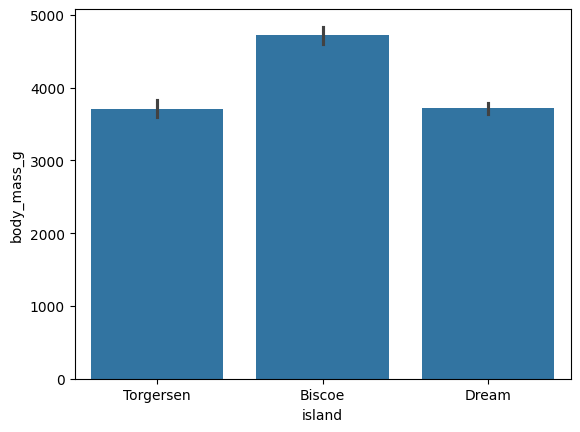

In [9]:
# 用 Seaborn 绘制基础柱状图
sns.barplot(data=df, x='island', y='body_mass_g')  #⭐1
plt.show()

# 👆调用 plt.show() 函数来展示 plot
# 也可以不写 plt.show()，jupyter notebook 或 google colab 会自动展示上面的图表
# 但画的图比较复杂时可能会在 output 里显示很多文字信息，因此最好每次都写 plt.show()

# ⭕【Barchart】
#   用 Seaborn 画 bar chart 时，默认输入的 x 轴值作为 category，y 轴值作为 amount
#   如果对于同一个 category，有多个 amount，则默认取平均值。可以通过修改【estimator参数】来改成别的值。

# ⭕【Error Bar】
#   黑色竖线是 error bar (误差线)。默认 sns.barplot() 函数中的【errorbar参数】 为 errorbar=('ci', 95)
#   意为使用 置信区间 (confidence interval) 公式计算误差 (error)，置信水平为 95% (“有 95% 的把握确定计算得出的结果就是误差区间”)。
#   默认 error bar 显示为一条黑线，可以通过设置 errcolor 和 errwidth 等参数来进一步设置 error bar。

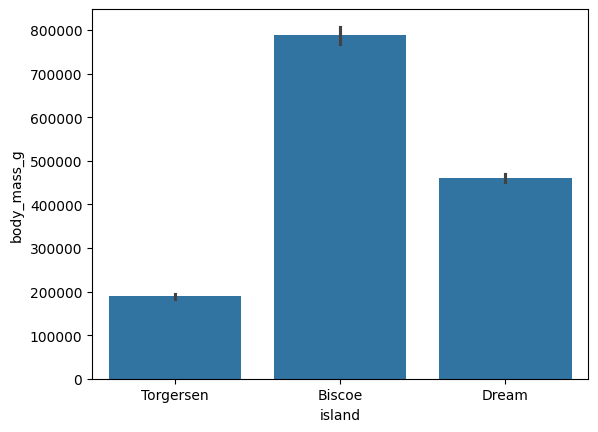

In [10]:
# 更改柱显示值为【总和】（默认为【平均值】）
sns.barplot(data=df, x='island', y='body_mass_g',estimator='sum')

#⭕【estimator参数】
#   默认 estimator='mean'，此处改成了 'sum' 来求每个岛上的企鹅总数

plt.show()

**相关链接: [`sns.barplot()` 函数的用法](https://seaborn.pydata.org/generated/seaborn.barplot.html)** (查看 ***estimator参数***  的用法)

In [11]:
# 展示你当前使用的 Seaborn 库的版本号
sns.__version__

# Seaborn 0.12 版本中，默认生成 bar chart 是不同颜色的 bar
# 但是这种颜色区分其实是 visual distraction，是 big duck
# 因为通过 x 轴上的名称标签已经可以区分这三个 bar 了，无需再用颜色区分

# 所以 Seaborn 0.13 版本中改进了这一点，全部默认为蓝色 bar

'0.13.2'

In [12]:
# 求所有来自【Biscoe岛】的企鹅的【体质量】的平均值
df.loc[(df['island']=='Biscoe'), 'body_mass_g'].mean()

#⭕注意：
#   这个值，即为刚才画的图表中，【Biscoe】bar 在 y轴 上对应的值。
#   因为【Biscoe岛】这个 category 下的【体质量】amount 有多个数值，调用 sns.barplot() 函数画图时默认取了平均值，并显示了误差范围（黑线）。

4716.017964071856

**<h3 id="section2.1.2">2.1.2 Count Plot</h3>**

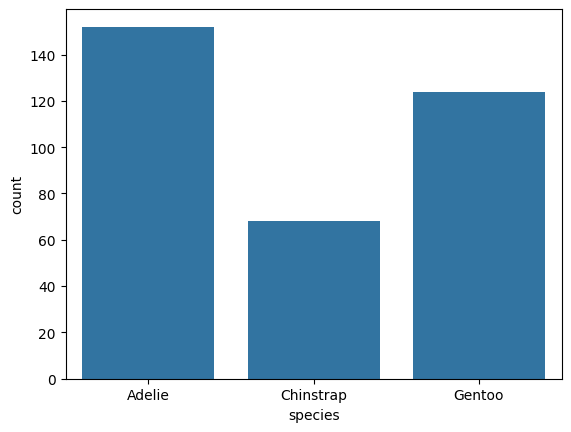

In [13]:
# 绘制计数图表
sns.countplot(data=df,x='species')

# 不同于 Bar Plot 需要输入两个轴的数据，计数图表只需要输入一个轴的数据，
# 他会自动统计每个 category 出现的次数，作为另一个轴的数据。
# 此处自动统计了 “每个种类的企鹅分别出现的次数”。

plt.show()

**相关链接： [`sns.countplot()` 用法](https://seaborn.pydata.org/generated/seaborn.countplot.html)**

**<h2 id="section2.2">2.2 柱分组 & 去除误差线</h2>**

**为了更好地展示信息，我们对 bar 进行分组，并去除 error bar (黑线)**

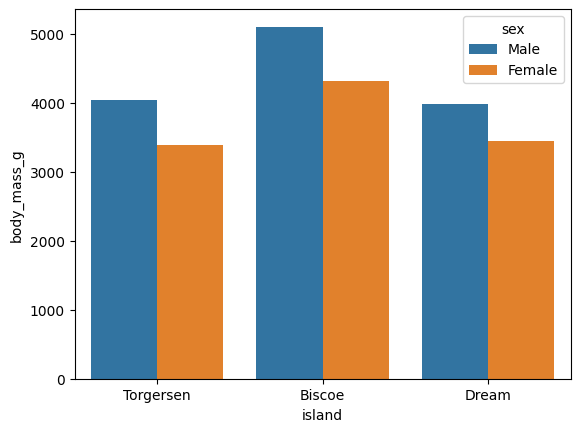

In [14]:
# 为了更好地展示信息，我们对 bar 进行分组，并去除 error bar (黑线)
sns.barplot(data=df, x='island', y='body_mass_g',errorbar=('ci',0),hue='sex')  #⭐2
plt.show()

#⭐2 在 ⭐1 的基础上，加入了两句 keyword argument：
# errorbar=('ci', 0) 和 hue='sex' 
# 来设置 “误差线” 和 “色相” 两个参数

#⭕【errorbar参数】
#   errorbar=('ci',0) 代表 “按照置信区间 (ci) 计算公式求误差范围，其中置信水平为 0% (即，完全不相信) ”，
#   而当置信水平为 0 的时候，置信区间的计算没有意义，没有误差范围。
#   即，没有 error bar。
#⭕【注意1】
#   此处完全可以直接设置 errorbar 参数为 errorbar=None，直接不计算误差范围（即，不显示黑线）。

#⭕【hue参数】
#   hue='sex' 意为用颜色/色相 (hue) 对 df 中的 'sex' attribute (性别列) 进行分组，并自动生成图例 (legend)。

**相关链接**
* **[`sns.barplot()` 函数的用法](https://seaborn.pydata.org/generated/seaborn.barplot.html)** （查看 ***errorbar 参数***  和 ***hue 参数*** ）

**<h2 id="section2.3">2.3 旋转刻度标签</h2>**

**当 categories 的名称 (岛名称，即当前x轴刻度名称) 过长且密集时，可以旋转刻度名称：**

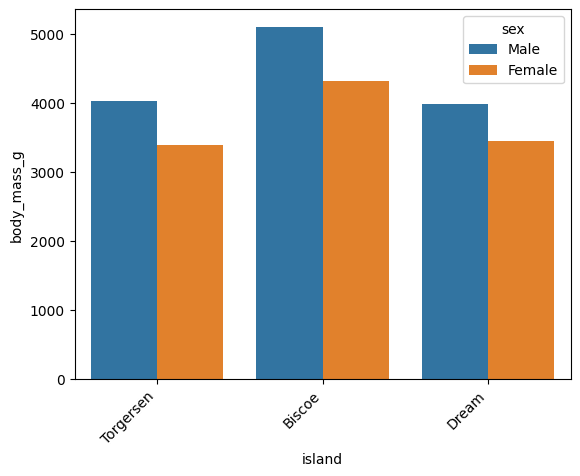

In [15]:
# 用 Matplotlib 库，让现在 x 轴的刻度标签(数字)分别旋转 45°
sns.barplot(data=df, x='island', y='body_mass_g',errorbar=('ci',0),hue='sex')  #⭐2
plt.xticks(rotation=45, ha='right')  

# 【rotation参数】旋转的角度数，默认逆时针旋转。
# 【ha参数】horizontal alignment (水平对齐) 的缩写，ha='right' 意为刻度标签的右端与刻度线对齐。
# 详见链接 plt.xticks() 函数用法中，对于【kwargs】(keyword argument) 栏目的介绍

plt.show()

**相关链接：**  
* **[`plt.xticks()` 函数用法](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)**   （ ***kwargs*** (keyword argument) 栏目中写了如何旋转刻度标签）


**然而，根据 [Wilke (2019, chap. 6.1)](https://clauswilke.com/dataviz/visualizing-amounts.html#bar-plots) 的主张，旋转的文字刻度并不方便阅读。对于 category 多且密集的表格，他建议让表格横过来排版:**

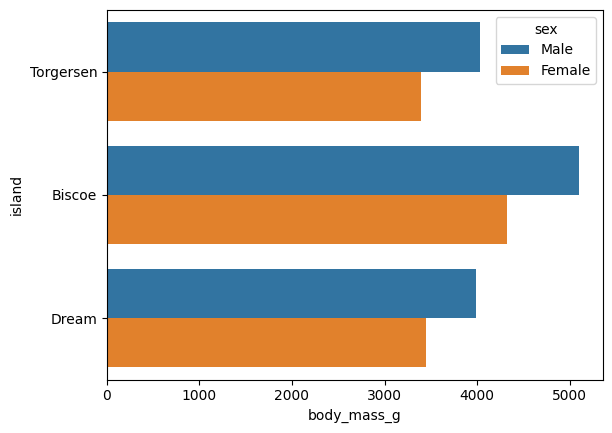

In [16]:
# 在 ⭐2 的基础上，交换 xy 轴的数据，使表格横过来
sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex')  #⭐3
#⭕注意：
#   xy 轴的 data 交换后，Seaborn 默认让 nominal data (此处为岛的名称) 
#   当 category，让 ratio data (此处为体质量) 当 amount；
#   而非仍然默认 x轴 为 category ，y轴 为 amount。

plt.show()

**但我们作图的时候并非必须要遵循 [Wilke (2019)](https://clauswilke.com/dataviz/) 的主张，也可以让刻度倾斜。**

**以上技巧同样适用于计数图表 (Count Plot)：**

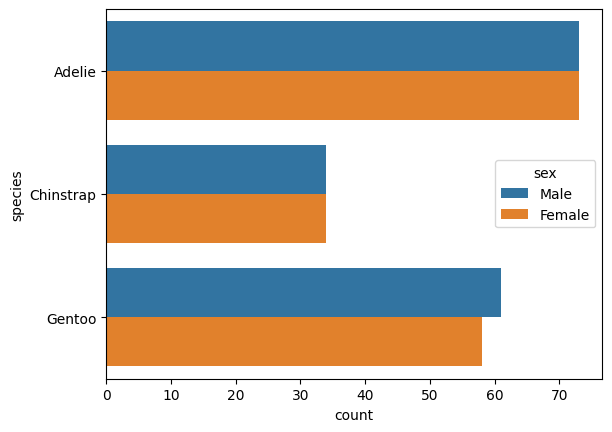

In [17]:
# 以上技巧同样适用于 Count Plot
sns.countplot(data=df, y='species', hue='sex')

# 直接让 y轴 当 categories，并根据性别按照颜色分组。
# 此时 x轴 代表 “每种企鹅出现的次数”

plt.show()

**<h2 id="section2.3">2.3 设置总主题风格</h2>**  

In [18]:
# 设置 Seaborn 绘图的总主题风格
sns.set_theme(font_scale=1.2, style='darkgrid')

# 字号 1.2，风格深色带网格。
# ⭕注意：sns.set_theme() 是 Seaborn 的一个全局函数，针对接下来所有用 Seaborn 画的图，而不是仅限于此代码块；
#   而 ax.set() 等方法（下文提到），仅针对 ax 这个具体的图表。

**`sns.set_theme()` 函数一般用于可视化项目最开始的时候设置全局绘图主题。**  
**如果想要恢复初始主题，可以直接调用 `sns.reset_orig()` 函数恢复全局默认设置。**

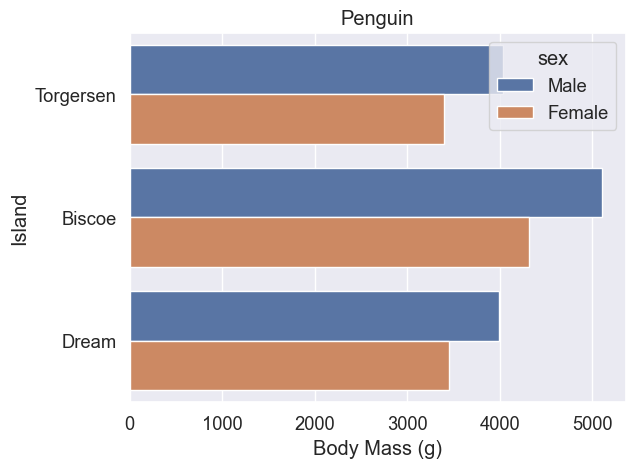

In [19]:
# 在新主题风格下用 Seaborn 画图
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex')  #还是⭐3，但定义了变量 ax，为了方便下一行 ax.set() 操作

# 然后，用 Matplotlib 库中的 ax.set() 方法 (method) ，给刚画的图表设置标题、标签等元素
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')

plt.show()

**⭕注意1：**  

👆此处的 ax 变量是一个用 Seaborn 生成的 Axes 对象（即，含有多个轴的图表对象）。  
把用 Seaborn 生成的一个具体图表 (具体 Axes 对象) 定义为 ax 变量之后，可以利用其他库 (比如 MatPlotLib) 再进行后续操作。  
此操作类似于给特定的 DataFrame 对象设置为 df 变量，然后再用具体的 方法 (method) 对 df 进行操作。

**⭕注意2：**

不要将 **Matplotlib 库** 中基于具体图表 (具体 Axes 对象) 的 **`ax.set()` 方法** 和 **Seaborn 库** 中的 **`sns.set()` 函数** 混淆。


* `sns.set()` 和 `sns.set_theme()` 是 Seaborn 库中，完全一致的函数，`sns.set()` 只是 `sns.set_theme()` 的别称罢了 (为了方便书写)。  
其中，`sns.set_theme()` 是该函数的首选接口 (preferred interface)。该函数用来设置 Seaborn 的全局主题风格。  

* `ax.set()` 是 Matplotlib 库中，基于具体图表对象的一个方法 (method)，用来修改具体图表对象。


**相关链接：**  
[`sns.set()` 函数](https://seaborn.pydata.org/generated/seaborn.set.html)  
[`sns.set_theme()` 函数](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)  
[`ax.set()` 方法](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)


**<h2 id="section2.4">2.4 调整图例</h2>**

**【拓展】*errorbar 参数* 设置对于图例位置的影响：**

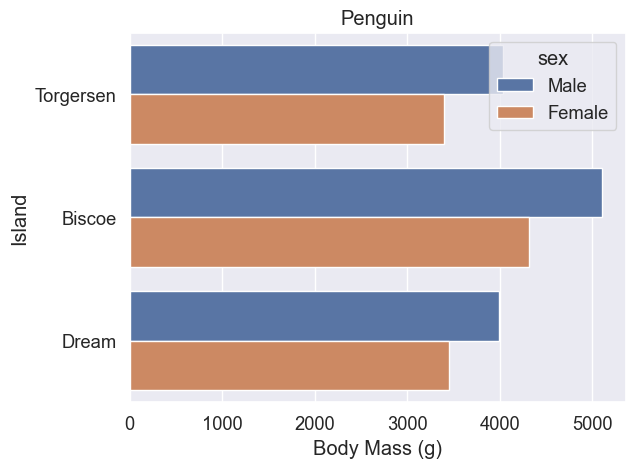

In [20]:
# errorbar 不存在
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex') 
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')

plt.show()

# ⭕注：error bar 不存在，图例自动生成在右边

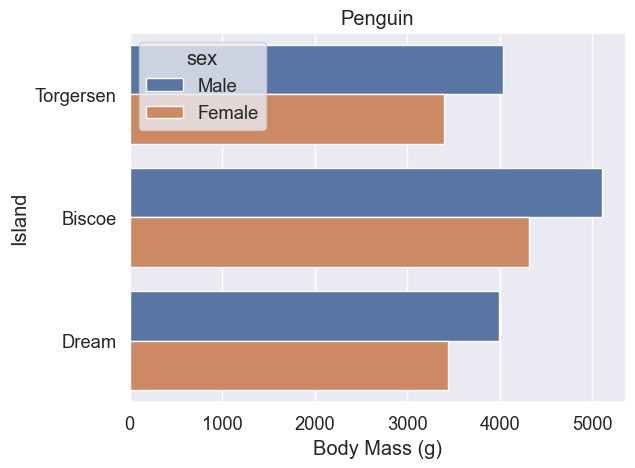

In [21]:
# errorbar 存在，但大小为0
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=('ci',0),hue='sex')
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')

plt.show()

#⭕注：error bar 存在但为 0，图例生成时自动避免了遮挡 error bar

**不论 `errorbar=('ci',0)` 还是 `errorbar=None`，上图中的图例 (legend) 对柱状图都有所遮挡，需要调整图例的位置。**

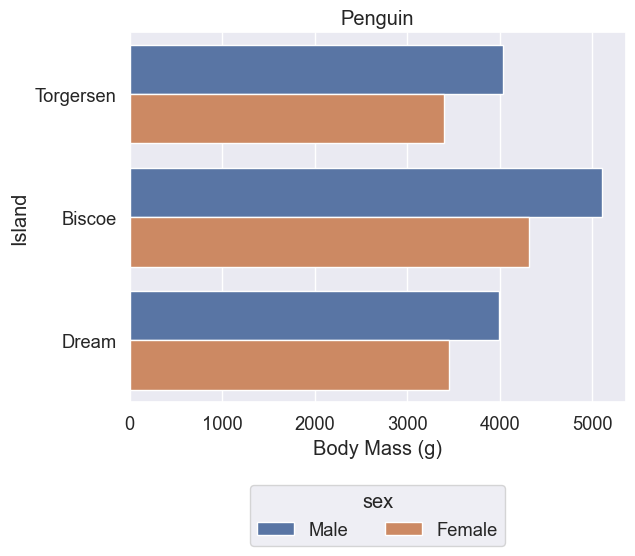

In [22]:
# ⭐3
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex')
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')

# 在 ⭐3 基础上加了一句函数调整图例位置大小
sns.move_legend(ax,bbox_to_anchor=(0.5,-0.2),loc='upper center',ncols=2)

#⭕【obj参数】
#   obj 参数是 sns.move_legend() 函数括号内的第一个参数。
#   它是一个图表对象，作为需要移动图例的源图表对象，此处为 ax。

#⭕【loc参数】
#   Seaborn 中此处的 loc参数 默认可以为 字符串 (str) 或 整数 (int)。
#   默认的字符串有 'upper left' 'upper center' 'down right' 等，
#   让图例自动位于图表的左上角、上部居中、右下角等位置。
#⭕【注意】
#   只设置了 loc参数 而不设置 bbox_to_anchor参数 时，loc 参数 代表 “图例位于整个图表的 XX (e.g. 右上角)”
#   而当同时设置了 loc参数 和 bbox_to_anchor参数 时，loc参数 代表 “图例的 XX (e.g.右上角) 位于整个图表的 (x,y) 位置”

#⭕【bbox_to_anchor参数】
#   用边界框来固定 (use a bound box to anchor the legend)。必须和 loc参数联用。
#   可以设置二元数组 (x,y) 或四元数组 (横坐标,纵坐标,宽度,高度)，此处只用了二元数组。
#   此处 bbox_to_anchor=(0.5,-0.2) 和 loc='upper center' 联用，
#   意为 “让图例的上边缘中点，位于整个图表的 (0.5,-0.2) 位置”。

#⭕【ncols参数】
#   图例的列数 (The number of columns that the legend has)，默认为 1
#   此处只有 male 和 female 两个组，最多分两列。

plt.show()

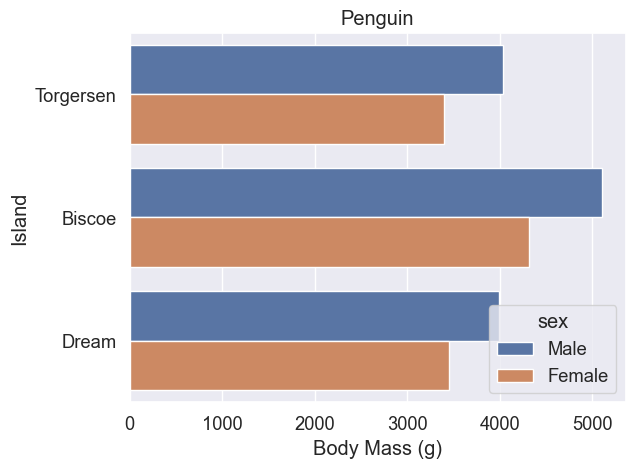

In [23]:
# 同上
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex')
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')

# 只设置 loc参数 而不设置 bbox_to_anchor参数
sns.move_legend(ax,loc='lower right')  

# 意为 “让图例位于整个图表的右下角”

plt.show()

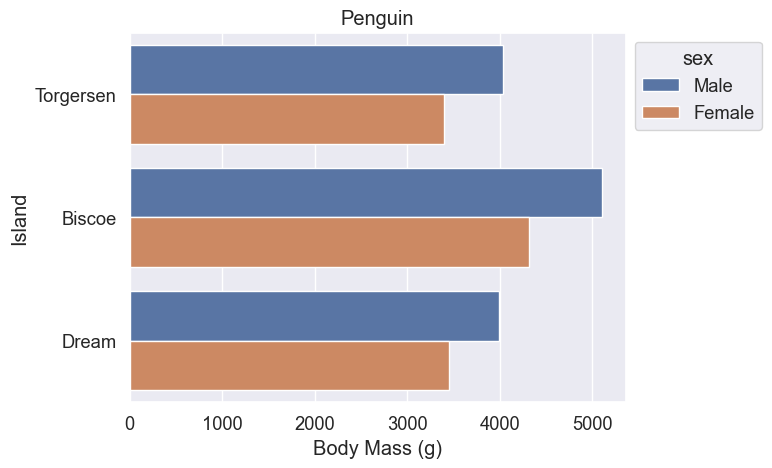

In [24]:
# 同上
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex')
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')

# bbox_to_anchor参数 和 loc参数 联用
sns.move_legend(ax,bbox_to_anchor=(1,1),loc='upper left')

# 意为 “让图例的左上角位于整个图表的 (1,1) 位置”

plt.show()

**相关链接：**  
**[`sns.move_legend()` 用法](https://seaborn.pydata.org/generated/seaborn.move_legend.html)** （查看 ***obj参数***  和 ***loc参数***  的用法）  
**[`matplotlib.axes.Axes.legend()` 用法](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)** （查看 ***loc参数***  ，***ncols参数*** 和 ***bbox_to_anchor参数*** 的用法）

**<h2 id="section2.5">2.5 修改颜色</h2>**

为了美观与直观，我们可以修改图表的颜色（但注意不要形成 big duck）。  
可以使用 Seaborn 库中预设的调色盘 (predifined Seaborn palettes)，或者手动输入十六进制颜色代码 (hexadecimal colour codes)。

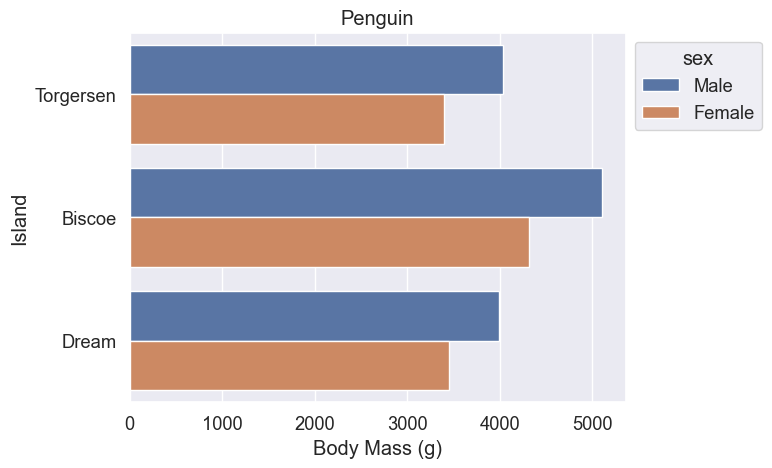

In [25]:
#【⭐4】默认初始 Seaborn 颜色方案
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex')
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')
sns.move_legend(ax,bbox_to_anchor=(1,1),loc='upper left')

plt.show()

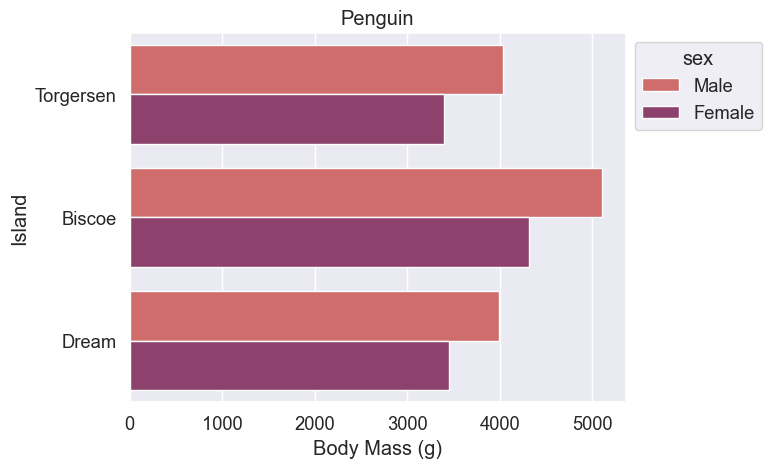

In [26]:
# ⭐4 的基础上，增加了 palette='flare' （'flare' 是 Seaborn 的预设颜色方案名称之一）
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex', palette='flare')
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')
sns.move_legend(ax,bbox_to_anchor=(1,1),loc='upper left')

plt.show()

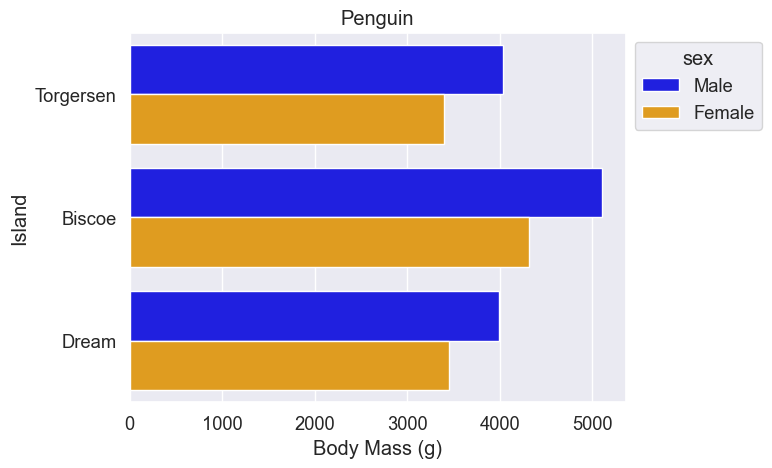

In [27]:
# Seaborn 预设颜色名称：'blue' 和 'orange'
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex', palette=['blue','orange'])
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')
sns.move_legend(ax,bbox_to_anchor=(1,1),loc='upper left')

plt.show()

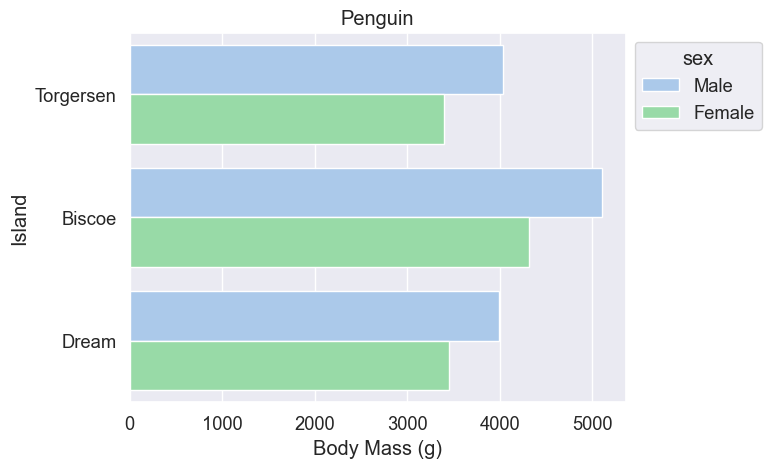

In [28]:
# 十六进制颜色代码：'#a1c9f4' 和 '#8de5a1'
ax = sns.barplot(data=df, y='island', x='body_mass_g',errorbar=None,hue='sex', palette=['#a1c9f4','#8de5a1'])
ax.set(title='Penguin', xlabel='Body Mass (g)', ylabel='Island')
sns.move_legend(ax,bbox_to_anchor=(1,1),loc='upper left')

plt.show()

**`sns.barplot()` 函数中的 `palette` 参数可以是:**  

>**1. Seaborn 的预定义调色板 (palette) 名称，可以直接通过名称调用，分别为：**  
>> **'deep'：** 一种深色调的调色板，适合区分度高的颜色。**(默认为 'deep')**  
>> **'muted'：** 柔和的颜色，适合低对比度的图表。  
>> **'bright'：** 鲜艳的颜色，适合强调某些重要信息。  
>> **'pastel'：** 柔和且淡雅的色调，适合平缓的展示。  
>> **'dark'：** 深色系调色板，适合与较暗的背景搭配。  
>> **'colorblind'：** 设计时考虑了色盲友好的配色，保证对不同色盲类型的用户依然可读。  
>
> **2. Matplotlib Colormap 的名称**  
>
>>Seaborn 库允许使用 Matplotlib 库的内置渐变色图 (colormap) 名称。Matplotlib 提供了多种配色方案，如：   
>>>**'viridis'：** 一个色盲友好的配色渐变，从深紫到亮黄。  
>>>**'plasma'：** 从深紫到亮黄色的渐变。  
>>>**'coolwarm'：** 从冷色到暖色的渐变。  
>>>**'Blues'、'Reds'：** 单色的不同明暗度的渐变。  
>>
>>使用这些 colormap 名称，颜色会按数据值的范围进行渐变显示。  
>
> **3. 'hls' 或 'husl'**  
>>这两种表示法使用 HLS 颜色模型 (Hue-Lightness-Saturation)，表示颜色的色相、亮度和饱和度。  
>>>**'hls'：** 标准的 HLS 模型，用于在色调之间平滑过渡。   
>>>**'husl'：** 将 HLS 模型改进为等感知度，保证色彩在感知上的均衡。   
>>
>>注：通常叫作 HSL 颜色模型 (Hue-Saturation-Lightness)，但 Seaborn 中写作 hls。
>
> **4. 'ch:\<cubehelix arguments>'**  
>>'cubehelix' 是一种颜色渐变方案，可以通过参数自定义颜色的范围、亮度等。    
>>例如，`palette='ch:s=0.5,r=-0.5'` 可以控制渐变中的色彩饱和度 (s: saturation) 和旋转方向 (r: rotation)。    
>>cubehelix 配色方案的特点是色盲友好，并且可用于灰度模式下的打印。  
>
> **5. 'light:\<color>', 'dark:\<color>'**  
>>这些表示法允许从给定颜色生成更浅或更深的版本。<color> 可以填写颜色名称或者十六进制颜色代码。  
>>比如：`palette='light: Blue'` 意为生成浅蓝色调；  
>>`palette='dark:#ff5733'` 意为生成给定颜色的深色版本。  
>
> **6. 'blend:\<color1>,\<color2>'**    
>>用于将两种颜色混合，形成一个新的调色板。例如：  
>>`palette='blend:Red,Blue'` 意为混合红色和蓝色生成中间过渡色调；    
>>`palette='blend:#ff5733,#33c5ff'` 意为使用具体的十六进制颜色混合。  
>
> **7. 其它形式的 Matplotlib 兼容的颜色代码序列，如：**  
>>十六进制颜色代码：例如 `palette=['#FF5733', '#33FF57', '#3357FF']`  
>>RGB 或 RGBA 元组：例如 `palette=[(1.0, 0.0, 0.0), (0.0, 1.0, 0.0), (0.0, 0.0, 1.0)]`  
>>Matplotlib 颜色名称：例如 `palette=['red', 'green', 'blue']`  

**相关链接：**  
[Seaborn `sns.set_theme()` 函数](https://seaborn.pydata.org/generated/seaborn.set_theme.html) （查看 ***palette参数*** ）  
[Seaborn `sns.color_palette()` 函数](https://seaborn.pydata.org/generated/seaborn.color_palette.html) （查看 ***palette参数***  预设调色盘名称表）    
[Matplotlib 预命名颜色一览](https://matplotlib.org/stable/gallery/color/named_colors.html)       
[Matplotlib Colormap 一览](https://matplotlib.org/stable/users/explain/colors/colormaps.html)  
[Matplotlib Colormap 使用介绍](https://matplotlib.org/stable/users/explain/colors/colormaps.html)  
[w3schools 颜色提取器](https://www.w3schools.com/colors/colors_picker.asp) （查看任意颜色的十六进制代码）

## **⭕拓展：两种求 “同一个岛屿内的企鹅总数” 的方式**   
(以便后续画 “不同岛屿上的企鹅总量” 柱状图时，根据企鹅总量大小进行 sort)  

**法1: Pandas `df.groupby()` 函数和 `.size()` 函数**

In [29]:
#【法1】Pandas df.groupby() 函数和 .size() 函数
df.groupby('island').size()

#👆根据 'island' 列进行分组，同一个岛的所有行都分为一组。分组后得到一个 groupby object。
#  再用 .size() 函数求该 groupby object 的数据大小。

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

**法2: Pandas `df.value_counts()` 函数**

In [30]:
#【法2】Pandas df.value_counts() 函数
df.value_counts('island')

# 直接用 .value_counts() 函数求 'island' 列内【每种】数据的数量。
# 如下，Biscoe 是一种数据，

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

**<h1 id="section3">3. 绘制其他图</h1>**

**<h2 id="section3.1">3.1 点线图</h2>**

为了避免在视觉上误导读者，柱状图的 amount 必须从 0 开始。因为根据直觉，每根柱子的面积应当显示了该种类对象的总量；柱状图应当直观体现不同类别总量之间的数量关系（比如，A地的企鹅总量是 B地的企鹅总量的 2倍，则 A柱 应该是 B柱 的两倍高）。同理，饼状图、柱状图等展示比例的图表应当避免使用 3D 图表，而应当使用 2D图表 (俯视)，因为 3D 图表改变观测角度之后，读者实际看到的图形面积比例并非真正的数据值比例，这样不够直观。这一原则被 **[Wilke (2019, chap.17)](https://clauswilke.com/dataviz/proportional-ink.html)** 称为 ***“The principle of proportional ink”*** 。   

而点线图则不必从 0 开始，点线图的点只展示柱状图中最高点的值。下图中自动生成的点线图即从 3250 开始。  
点线图的另一个优点是，比起柱状图，点线图的 data-ink ratio 更高，即，有效信息量占据图表总信息量（总 ink 量）的比例更高，干扰信息更少。  

（但柱状图的优点是能直观展示数量比例，需要根据具体实例选择用哪种图表）

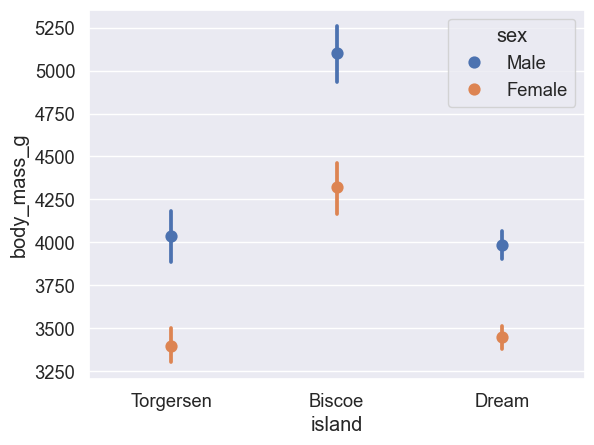

In [31]:
# 用 sns.pointplot() 函数画点线图
sns.pointplot(data=df, x='island', y='body_mass_g', hue='sex',linestyle='none')

#⭕注意：
#   也可以不写 linestyle='none'，而写 join=False，意为不显示点与点之间的折线。
#   但是，join 参数将在 v0.15.0 版本的 Seaborn 库中被移除，建议使用 linestyle='none'

# 图中每个点上下的线是误差线

plt.show()

此处的 category 数据为不同的岛屿，是 nominal 而不是 ordinal 数据，不同岛屿名称之间没有联系，因此不必展示点之间的连线。

**相关链接：[`sns.pointplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.pointplot.html#)**

**<h2 id="section3.2">3.2 直方图</h2>**

柱状图 (bar chart) 的 x轴 一般是离散的几种数据类别 (discrete data categories)，其数据类型一般是 norminal 或 ordinal；而直方图 (histogram) 的 x轴 是连续的数据区间 (continuous data range)，数据类型是 ratio。

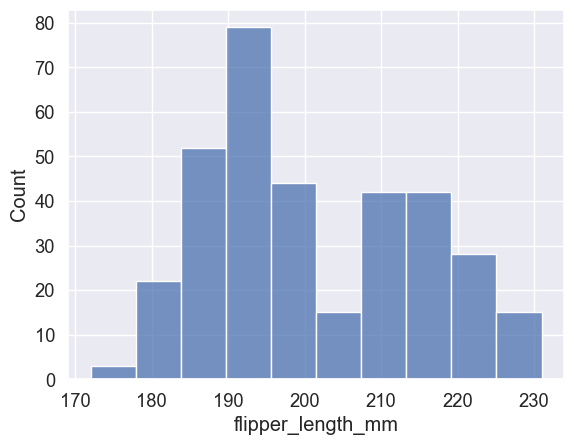

In [32]:
# 用 sns.histplot() 函数画直方图
sns.histplot(data=df, x='flipper_length_mm')  # x: 鳍长(mm)

plt.show()

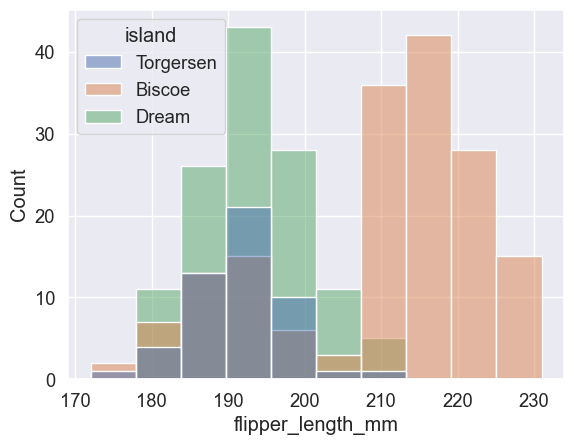

In [33]:
# 增加 hue 参数设置
sns.histplot(data=df,x='flipper_length_mm'
             ,hue='island'  # 按照岛屿进行颜色分组。
                            # 相当于每个岛屿内的企鹅单独画了一个 histogram，
                            # 再将四个 histogram 重叠了起来。
             )

# 注意纵坐标值范围，已产生变化。

plt.show()

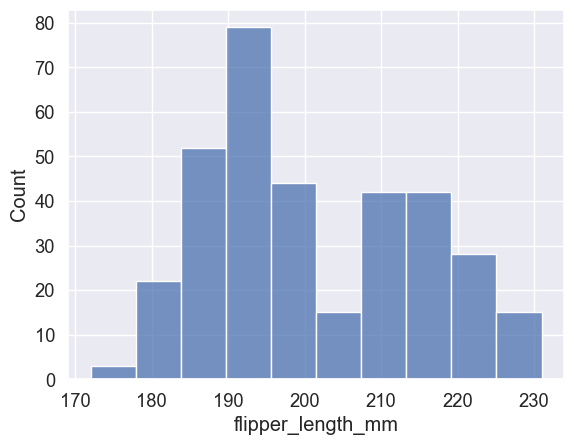

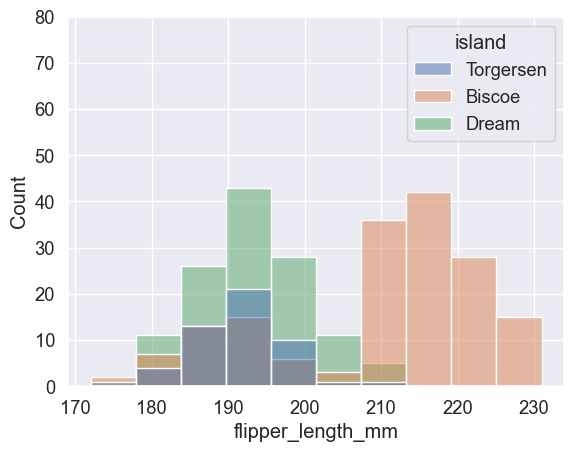

In [34]:
#【1】原直方图
sns.histplot(data=df, x='flipper_length_mm')
plt.show() #👈展示第一个直方图 (原直方图)

#【2】增加 hue 参数设置后的直方图
sns.histplot(data=df,x='flipper_length_mm'
             ,hue='island'
             )

# 可以通过设置 plt.ylim() 函数来调整 y 轴的刻度值范围，让两张图刻度范围一样，来观察区别
plt.ylim(0,80)  
plt.show() #👈展示第二个直方图

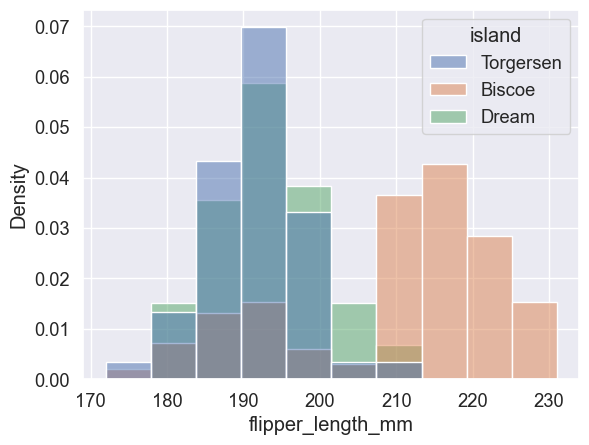

In [35]:
sns.histplot(data=df, x='flipper_length_mm'
             ,hue='island'        # 按照岛屿进行颜色分组
             ,stat='density'      # 使 bins 面积之和为 1，表示概率密度。
             ,common_norm= False  # 对整个每个组（每个岛屿）的数据单独进行归一化处理，下文会解释
             )

plt.show()

**<h3 id="section3.2.1">3.2.1 stat 参数</h3>**

填写字符串值。用于调整绘制直方图时所使用的统计方法。  
`stat` 参数可以填写：  
* 'count'  
* 'frequency'  
* 'probability' 或 'proportion'  
* 'percent'  
* 'density'  

**1. `'count'`**  
每个分箱 (bin) 的【高度】等于【该分箱中数据点的数量】(count，又称“频数”)。  
这是最基本的直方图类型，每个条形表示有多少数据点落入该分箱。  
* **例如:**   
在第一个直方图 `sns.histplot(data=df, x='flipper_length_mm')` 中，鳍长为180-185mm区间内 (一个bin单位的区间) 的企鹅共有22只，则该 bin 的高度为22。  
**注:** 实际上此图自动生成的 bin 区间并不是正好 180-185mm，真正的区间长度约为 5.9mm，此处为了方便演示，估算为 5mm。以下例子都是估算值。 

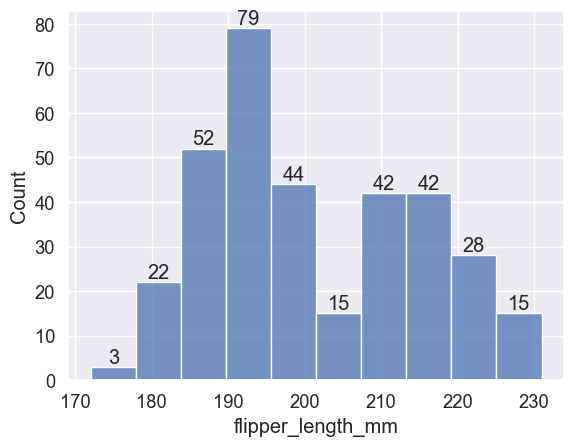

In [36]:
#⭕【1】stat='count'
ax = sns.histplot(data=df, x='flipper_length_mm',stat='count')

# 在每个条形上显示 bin 的【高度 (计数)】，此处仅为了方便展示，不用管下面的代码是什么意思。
for p in ax.patches:
    height = p.get_height()  # 获取条形高度
    ax.text(p.get_x() + p.get_width() / 2, height, int(height),  # int() 取整
            ha='center', va='bottom')  # 在每个条形顶部显示高度
    
plt.show()

**2. `'frequency'`**    
每个 bin 的【高度】等于【该 bin 中的数据点数量】除以【该 bin 的宽度区间】。即，bin 高度 = 单位宽度区间内的数据点数量。    
通过 bin 宽度区间来标准化数据点数量，可以用于处理 bin 宽度不统一的直方图。  
* **例如:**    
鳍长为180-185mm区间内 (宽度为5) 的企鹅共有22只，则该 bin 的高度为22/5=4.4。  
**注：** 真正高度约为 22/5.9，约为3（如图）。

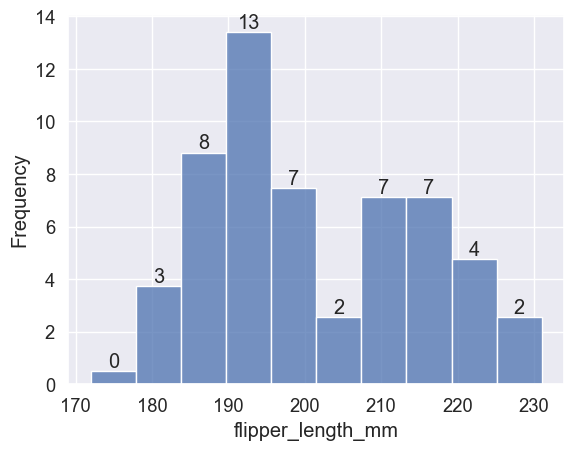

In [37]:
#⭕【2】stat='frequency'
ax = sns.histplot(data=df, x='flipper_length_mm',stat='frequency')

# 在每个条形上显示 bin 的【高度】
for p in ax.patches:
    height = p.get_height()  # 获取条形高度
    ax.text(p.get_x() + p.get_width() / 2, height, int(height),  # int() 取整
            ha='center', va='bottom')  # 在每个条形顶部显示高度

plt.show()

**3. `'probability'` 或者 `'proportion'`**   
归一化直方图，使所有 bin 的【高度】加起来为 1。   
每个 bin 中的数据点数量除以总的数据点数量，从而表示每个分箱的数据比例。   
* **例如:**    
总共有344只企鹅，鳍长为180-185mm区间内有22只企鹅，则该 bin 的高度为22/344=0.064  


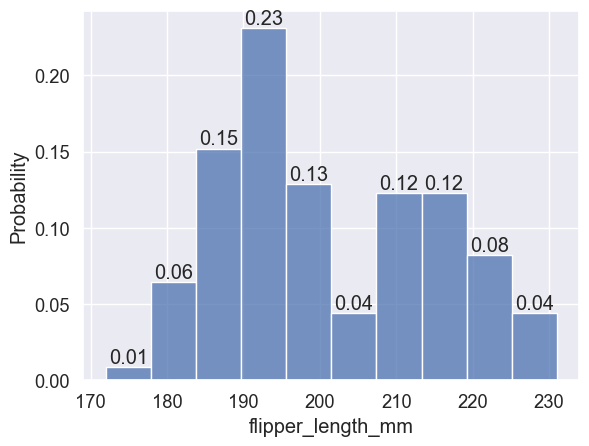

In [38]:
#⭕【3】stat='probability'
ax = sns.histplot(data=df, x='flipper_length_mm',stat='probability')

# 在每个条形上显示 bin 的【高度】
for p in ax.patches:
    height = p.get_height()  # 获取条形高度
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}',  # f'{}' 保留小数点后两位
            ha='center', va='bottom')  # 在每个条形顶部显示高度

plt.show()

**4. `'percent'`**  
归一化直方图，使所有条形的【高度】加起来为 100。  
将每个分箱中的数据点数量转换为百分比。  
* **例如:**  
总共有344只企鹅，鳍长为180-185mm区间内有22只企鹅，则该 bin 的高度为(22/344)*100=6.4，    
即，鳍长为180-185mm区间内的企鹅数量占据总企鹅数量的 6.4%  

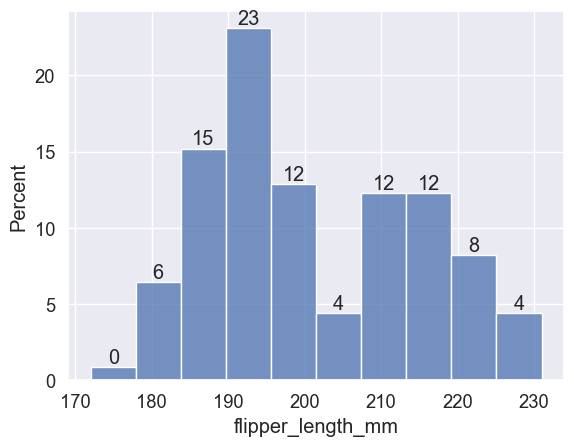

In [39]:
#⭕【4】stat='probability'
ax = sns.histplot(data=df, x='flipper_length_mm',stat='percent')

# 在每个条形上显示 bin 的【高度】
for p in ax.patches:
    height = p.get_height()  # 获取条形高度
    ax.text(p.get_x() + p.get_width() / 2, height, int(height), # int() 取整
            ha='center', va='bottom')  # 在每个条形顶部显示高度

plt.show()

**⭐5. `'density'`**   
归一化直方图，使条形总面积等于 1。此图称为 “频率分布直方图”，高中学的。  
bin高度 = 频率密度 = 频率 / 组距 = 【bin内数据量/总数据量】/【bin宽度】  
这样，每个 bin 的面积即为该 bin 内数据量的频率，全图所有 bin 的面积总和为 1。    
这种方式的直方图常用于估计概率密度函数。     
* **例如:**  
总共有344只企鹅，鳍长为180-185mm区间内有22只企鹅，则该 bin 的高度为 22/(5*344)=0.013  
* **拓展：**   
当频率分布直方图的 bin 宽度无限趋近于 0 时，所有 bin 的最高点将连成一个光滑曲线——总体密度曲线，也就形成了密度图。   

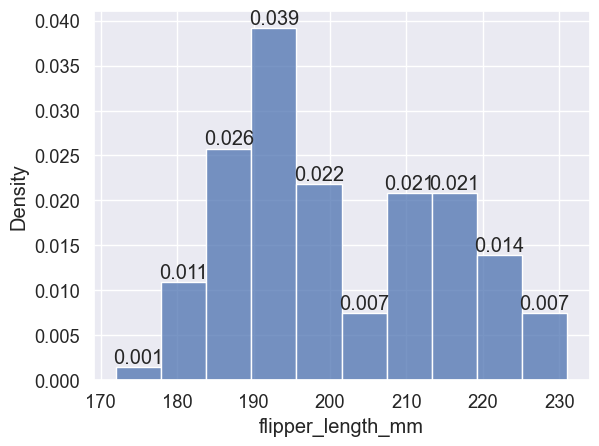

In [40]:
#⭕【5】stat='density'
ax = sns.histplot(data=df, x='flipper_length_mm',stat='density')

# 在每个条形上显示 bin 的【高度】
for p in ax.patches:
    height = p.get_height()  # 获取条形高度
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:.3f}', # f'{}' 保留小数点后三位
            ha='center', va='bottom')  # 在每个条形顶部显示高度

plt.show()

**<h3 id="section3.2.2">3.2.2 common_norm 参数</h3>**

`common_norm` 是一个布尔参数（True 或 False），用于控制是否在数据归一化时对整个数据集进行统一处理，默认为 True。  
即，当 `stat` 参数为 `'probability'` , `'proportion'` , `'percent'` 或 `'density'` 时，`common_norm` 参数才能发挥作用。  

* 当 `common_norm=True` 时，归一化会针对 **整个数据集** 进行处理。这意味着在分组（例如通过 hue 参数）进行绘图时，所有组的直方图将共享同一个归一化标准。这样，直方图的条形高度可以直接在不同组之间比较，因为归一化基于整个数据集。  

* 当 `common_norm=False` 时，归一化会针对 **每个子组** 单独进行。这意味着每个组的直方图会各自归一化，条形高度的比例仅在同一组内有意义，但不适用于不同组之间的比较。

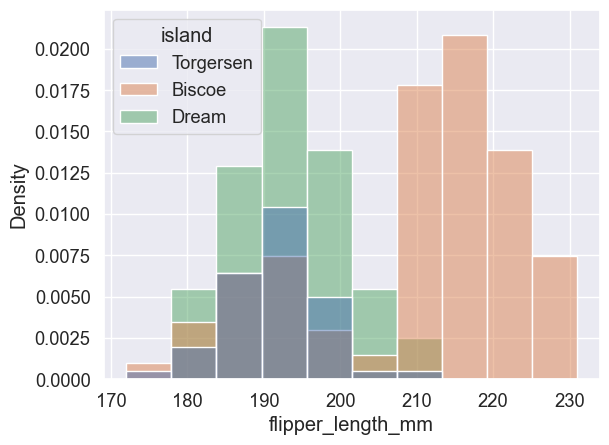

In [41]:
# common_norm = True
sns.histplot(data=df, x='flipper_length_mm'
             ,hue='island'       # 按照岛屿进行颜色分组
             ,stat='density'     # 使 bins 面积之和为 1，表示概率密度。
             ,common_norm=True   # 对整个数据集（所有组）进行归一化处理。即，所有颜色的 bins 面积总和为 1。
                                 # 注：bins 都是默认半透明的，三组分布重叠在一起。
             )

plt.show()

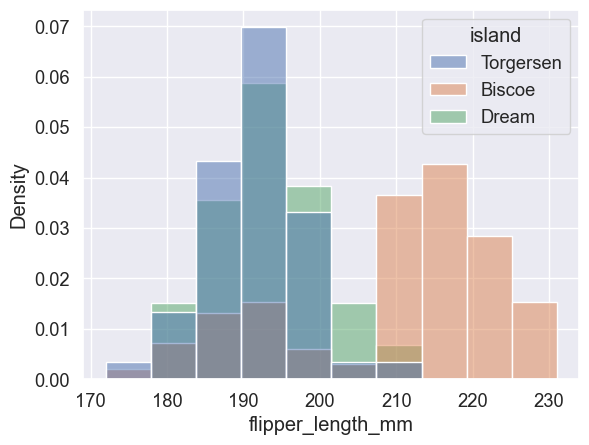

In [42]:
# common_norm = False
sns.histplot(data=df, x='flipper_length_mm'
             ,hue='island'       # 按照岛屿进行颜色分组
             ,stat='density'     # 使 bins 面积之和为 1，表示概率密度。
             ,common_norm=False  # 对每个组（岛屿）单独进行归一化处理。
                                 # 即，每种颜色的 bins 面积之和分别为 1，
                                 # 即，所有蓝色的 bins (Torgersen岛) 面积总和加起来为 1；
                                 # 所有橘黄色 bins (Biscoe岛) 面积加起来为 1；
                                 # 所有绿色 bins (Dream岛) 面积加起来也为 1。
             )

plt.show()

**⭕拓展：**  
当组数较多时，用颜色分组后，不同组别的分布图重叠在一起，可能并不直观。可以选择每个组单独做一个分布图。  
可以通过 `data=df[df['特定列']==特定值]` 来筛选想要画图的【行】。  
如：`data=df[df['island']=='Torgersen']` 意为 “选出所有在 Torgersen 岛上的企鹅 (所在的行)，作为数据进行绘图”

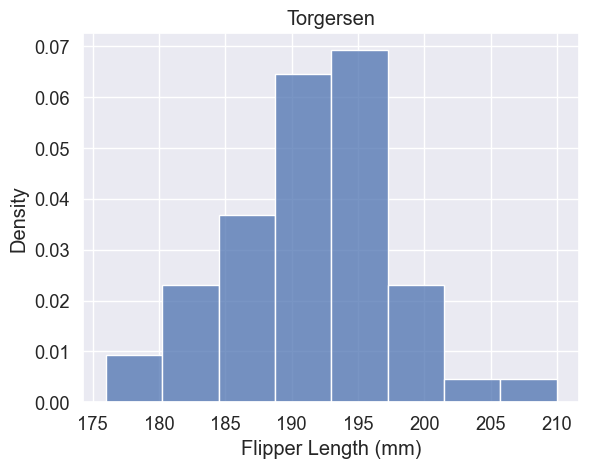

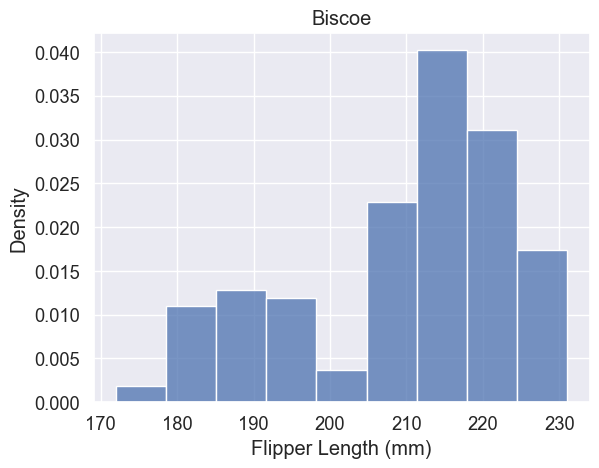

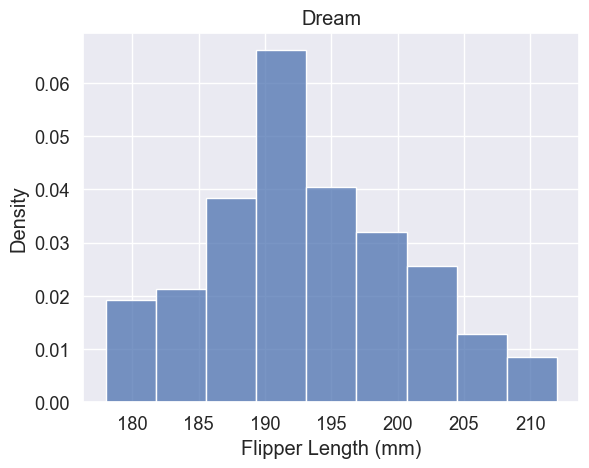

In [43]:
# 分布图1：Torgersen 岛上所有企鹅根据鳍长的分布情况
ax = sns.histplot(data=df[df['island']=='Torgersen'], x='flipper_length_mm',stat='density')
ax.set(title='Torgersen', xlabel='Flipper Length (mm)')
plt.show()

# 分布图2：Biscoe 岛上所有企鹅根据鳍长的分布情况
ax = sns.histplot(data=df[df['island']=='Biscoe'], x='flipper_length_mm',stat='density')
ax.set(title='Biscoe', xlabel='Flipper Length (mm)')
plt.show()

# 分布图3：Dream 岛上所有企鹅根据鳍长的分布情况
ax = sns.histplot(data=df[df['island']=='Dream'], x='flipper_length_mm',stat='density')
ax.set(title='Dream', xlabel='Flipper Length (mm)')
plt.show()

**相关链接： [`sns.histplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.histplot.html)** （查看 ***hue参数*** ，***stat参数*** 和 ***common_norm参数*** ）

**<h2 id="section3.3">3.3 箱线图</h2>**

箱线图（boxplot，也称为盒须图）是一种图表，用于表示数据的分布、集中趋势和离散性。  
箱线图展示了数据的最小值（Min）、第一四分位数（Q1）、中位数（Q2）、第三四分位数（Q3）和最大值（Max），并用“须”来描绘数据分布的范围，超出须的点通常表示异常值。  

**箱线图的结构：**  
**箱体：** 从Q1延伸到Q3，代表数据的中间50%。  
**箱内的线：** 表示中位数（Q2）。  
**须 (whisker)：** 从Q1和Q3向外延伸，通常到达离Q1和Q3 1.5倍IQR（四分位距）以内的最小 (Min) 和最大值 (Max)。  
**异常值 (outlier)：** 超过须的点被单独标记出来，显示数据中的极端值。  

<img src="https://3232.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F651b821c-3a18-4974-bc1c-e01f9e3a12d7%2F059d44cb-8c69-451f-92dc-92b313c5e7d5%2Fimage-1.png?table=block&id=12ca25f9-fecd-80c9-99c5-d7ba83b7d470&spaceId=651b821c-3a18-4974-bc1c-e01f9e3a12d7&width=2000&userId=&cache=v2" width="30%">

<img src="https://3232.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F651b821c-3a18-4974-bc1c-e01f9e3a12d7%2F54b431a4-9065-43f7-aa2d-bcff712bad2d%2Fimage-2.png?table=block&id=12ca25f9-fecd-8067-97f6-dd74897408fa&spaceId=651b821c-3a18-4974-bc1c-e01f9e3a12d7&width=2000&userId=&cache=v2" width="30%">

**箱线图 vs. 直方图**  

<img src='https://3232.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F651b821c-3a18-4974-bc1c-e01f9e3a12d7%2F500e943d-da9e-4cf8-91e7-b584f40acee6%2Fimage-3.png?table=block&id=12ca25f9-fecd-8052-b7a2-c37c8a947fb7&spaceId=651b821c-3a18-4974-bc1c-e01f9e3a12d7&width=2000&userId=&cache=v2' width='65%'> 
 
**总结来说，【箱线图】适合【快速识别数据 大致分布 和 异常值】，而【直方图】则更适合了解【具体区间内的频率分布】。**

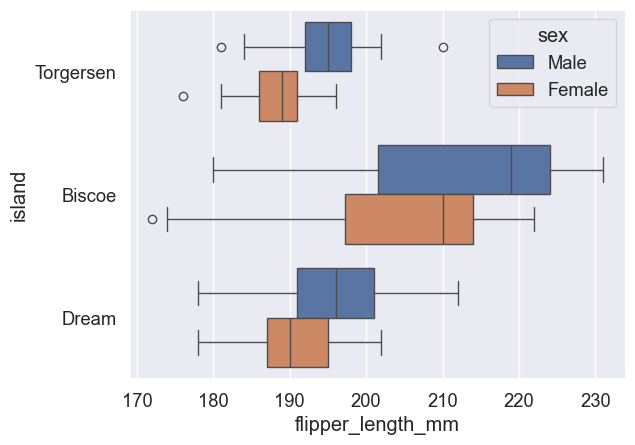

In [44]:
# 用 sns.boxplot() 函数绘制箱线图
sns.boxplot(data=df, x='flipper_length_mm', y='island',hue='sex')

#👆绘制不同岛屿上雌雄企鹅各自的箱线图

plt.show()

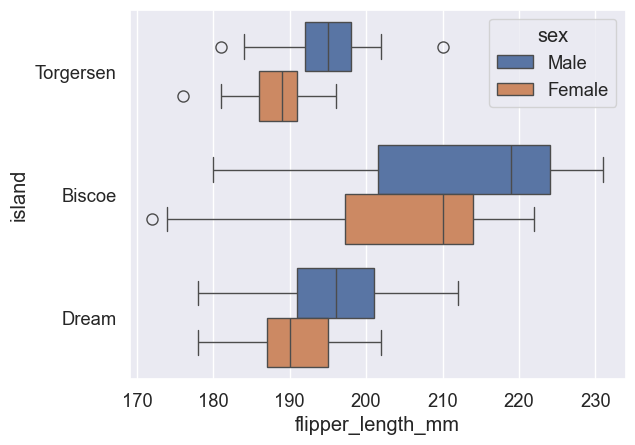

In [45]:
# 调整【fliersize参数】来修改异常点的大小
sns.boxplot(data=df, x='flipper_length_mm', y='island', hue='sex'
             ,fliersize=8   # 异常点的大小设置为 8 个单位。
            )

plt.show()

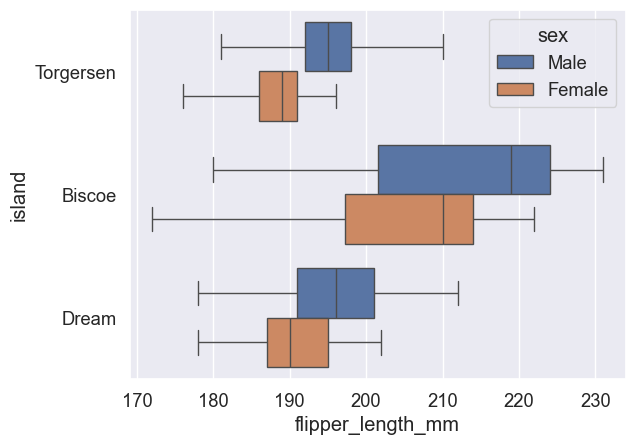

In [46]:
# 调整【whis参数】来修改须的长度范围
sns.boxplot(data=df, x='flipper_length_mm', y='island', hue='sex'
             ,fliersize=8   # 异常点的大小设置为 8 个单位。
             ,whis=2        # 须分别延伸至距离 Q1 和 Q3【2倍IQR】的范围。默认为 1.5倍IQR。
                            # 注：此处 whis 设置为 2 之后，须 (whisker) 已经涵盖了所有数据值，图上也就没有异常点了。
            )

plt.show()

**相关链接：[`sns.boxplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.boxplot.html)** (查看 ***fliersize参数***  和 ***whis参数***  )

**<h2 id="section3.4">3.4 小提琴图</h2>**

小提琴图类似箱线图和直方图，也能直观显示数据的大致分布情况以及中位数。  
不同于箱线图，小提琴图不能直观显示异常点；而不同于直方图，小提琴图的分布呈现光滑的曲线而非逐个 bins。  
需要注意的是，当数据总量很少的时候，小提琴图的光滑曲线可能误导读者，可以选择直方图或者箱线图。

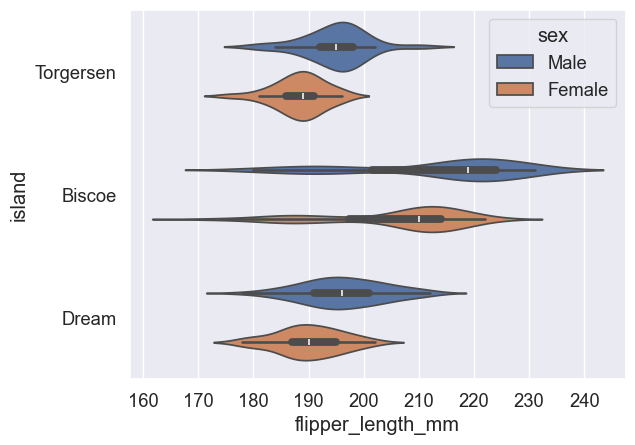

In [47]:
# 用 sns.violinplot() 函数绘制小提琴图
sns.violinplot(data=df, y='island', x='flipper_length_mm', hue='sex')

plt.show()

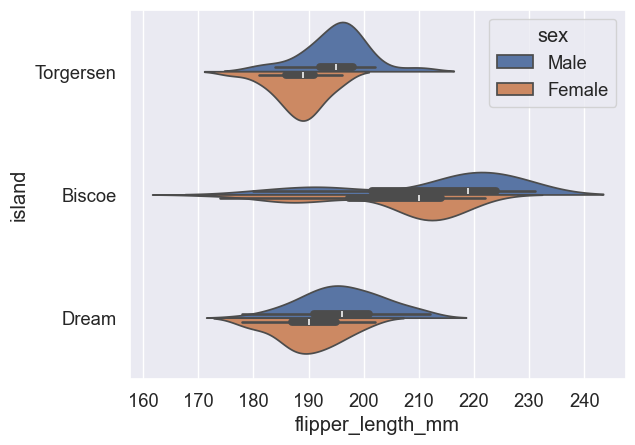

In [48]:
# 通过【split参数】控制不同分组的图是否合并在一起
sns.violinplot(data=df, y='island', x='flipper_length_mm', hue='sex'
                ,split=True  # 加入 split=True，让不同分组（不同性别）的图合并在一起，便于观察
               )

plt.show()

**相关链接：[`sns.violinplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.violinplot.html)** (查看 ***split参数*** )

**<h2 id="section3.5">3.5 散点图 & 分簇散点图</h2>**

分布散点图 (strip plot) 用于显示数据分布情况。不同于前面提到的几种描绘分布情况的图，  
散点图不是用一个图形来描述整体分布情况，而是画出所有数据点，每个数据点都显示为一个圆点。  
但当同一个值上的数据点过多时，圆点可能重叠。  

**注意：**   
strip plot 用于显示数据的分布情况（一个数据在不同区间内有多少量），  
和用于显示数据变化趋势（一个数据随另一个数据变化而呈现什么样的变化趋势）的 scatter plot 不同。

<img src='https://3232.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F651b821c-3a18-4974-bc1c-e01f9e3a12d7%2F846ea4db-0f24-4875-aed5-3be0868c6722%2Fimage.png?table=block&id=12ca25f9-fecd-8025-8239-fa09575bf49b&spaceId=651b821c-3a18-4974-bc1c-e01f9e3a12d7&width=2000&userId=&cache=v2' width='60%'>

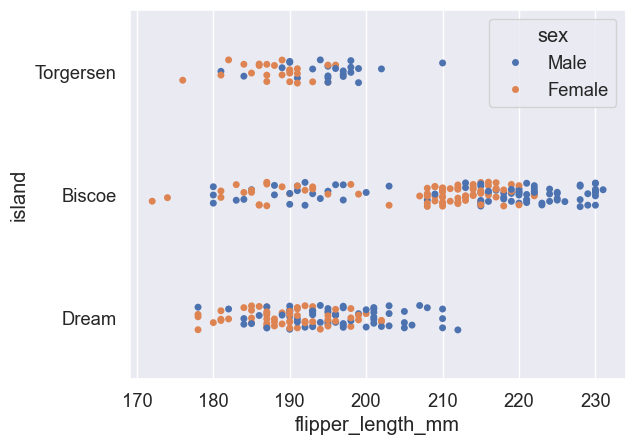

In [49]:
# 用 sns.stripplot() 函数绘制散点图
sns.stripplot(data=df,x='flipper_length_mm',y='island',hue='sex')
plt.show()

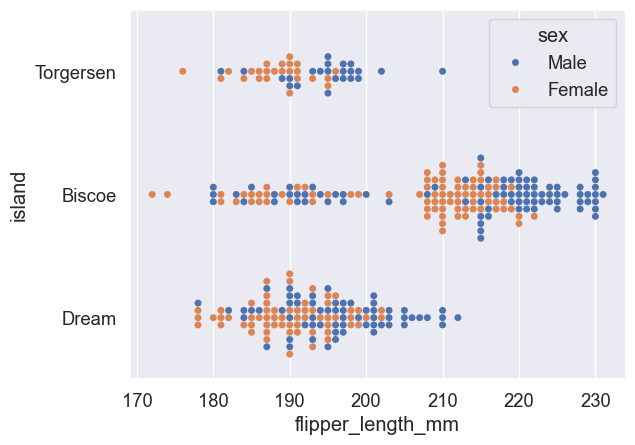

In [50]:
# 用 sns.swarmplot() 函数绘制分簇散点图
sns.swarmplot(data=df,x='flipper_length_mm',y='island',hue='sex')
plt.show()

**相关链接：**  
[`sns.stripplot()` 函数](https://seaborn.pydata.org/generated/seaborn.stripplot.html)  
[`sns.swarmplot()` 函数](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

**<h1 id="links">相关链接合集</h1>**   

>**总体链接：**   
>**[Python3 教程文档 (中文)](https://docs.python.org/zh-cn/3/library/functions.html)** (查看内置函数用法等)    
>**[Pandas库 教程文档](https://pandas.pydata.org/docs/reference/frame.html)** (DataFrame)     
>**[Matplotlib库 教程文档](https://matplotlib.org/stable/api/pyplot_summary.html)** (plt)    
>**[Seaborn库 教程文档](https://seaborn.pydata.org/generated/seaborn.barplot.html)** (barplot)   
>
>**[`sns.barplot()` 函数](https://seaborn.pydata.org/generated/seaborn.barplot.html)**（用 Seaborn 绘制 柱状图）  
>**[`sns.countplot()` 函数](https://seaborn.pydata.org/generated/seaborn.countplot.html)** （用 Seaborn 绘制 计数图）    
>
>**修改图表主题风格：**  
>**[`plt.xticks()` 函数](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)** （ ***kwargs*** (keyword argument) 栏目中写了如何旋转刻度标签）   
>**[`sns.set()` 函数](https://seaborn.pydata.org/generated/seaborn.set.html)** （同 `sns.set_theme()` 函数）  
>**[`sns.set_theme()` 函数](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)** （设置 Seaborn 绘图的全局主题风格）  
>**[`ax.set()` 方法](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)** （Matplotlib 中 对于特定图表 ax 设置标题、轴标签等元素的方法）  
>
>**修改图例：**  
>**[`sns.move_legend()` 函数](https://seaborn.pydata.org/generated/seaborn.move_legend.html)** （Seaborn 中 移动图例的函数）（查看 ***obj参数***  和 ***loc参数***  的用法）  
>**[`matplotlib.axes.Axes.legend()` 函数](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)** （Matplotlib 中 设置图例的函数，其指令也适用于 `sns.move_legend()`）（查看 ***loc参数***  ，***ncols参数*** 和 ***bbox_to_anchor参数*** 的用法）
>
>**修改图表颜色：**  
>**[Seaborn `sns.color_palette()` 函数](https://seaborn.pydata.org/generated/seaborn.color_palette.html)** （查看 ***palette参数***  预设调色盘名称表）    
>**[Matplotlib 预命名颜色一览](https://matplotlib.org/stable/gallery/color/named_colors.html)**    
>**[Matplotlib Colormap 一览](https://matplotlib.org/stable/users/explain/colors/colormaps.html)**  
>**[Matplotlib Colormap 使用介绍](https://matplotlib.org/stable/users/explain/colors/colormaps.html)**        
>**[w3schools 颜色提取器](https://www.w3schools.com/colors/colors_picker.asp)** （查看任意颜色的十六进制代码）
>
>**其他图表：**  
>**[`sns.pointplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.pointplot.html#)** （点线图画法）  
>**[`sns.histplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.histplot.html)** （频率分布直方图画法）（查看 ***hue参数*** ，***stat参数*** 和 ***common_norm参数*** ）  
>**[`sns.boxplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.boxplot.html)** （箱线图画法） (查看 ***fliersize参数***  和 ***whis参数***  )   
>**[`sns.violinplot()` 函数用法](https://seaborn.pydata.org/generated/seaborn.violinplot.html)** （小提琴图画法）  
>**[`sns.stripplot()` 函数](https://seaborn.pydata.org/generated/seaborn.stripplot.html)** （分布散点图画法）    
>**[`sns.swarmplot()` 函数](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)** （分簇分布散点图画法）  
>
>**教材书 *Fundamentals of Data Visualization*  (Wilke, 2019) ：**  
>**[6.1 Bar Plot](https://clauswilke.com/dataviz/visualizing-amounts.html#bar-plots)** (旋转的文字刻度不方便阅读，应当横过来排版)   
>**[17. The Principle of Proportional Ink](https://clauswilke.com/dataviz/proportional-ink.html)** （比例标记的原则：图形大小比例应当和数据真实的比例一样。e.g. 柱状图的柱子应当从 0 开始）   
>

**<p><a href="#top">⇧ 返回页面顶部</a></p>**